In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from time import time

In [2]:
df_train = pd.read_csv('house.csv')
print(df_train.shape)
df_train.head(3)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Dataset has 1460 rows and 81 Columns

## Exploratory Data Analysis

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


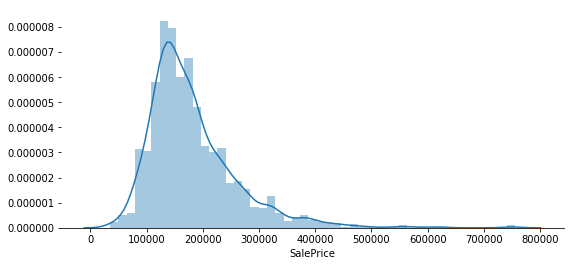

In [41]:
print(df_train.SalePrice.describe())
plt.figure(figsize=(9,4))
sns.distplot(df_train.SalePrice);
sns.despine(left=True)

The distribution of Sale Price
    1. Deviate from the normal distribution.
    2. Have appreciable positive skewness.
    3. Show peakedness.


In [42]:
print('Skewness: %f'% df_train.SalePrice.skew())
print('Kurtosis: %f'% df_train.SalePrice.kurtosis())

Skewness: 1.882876
Kurtosis: 6.536282


In [151]:
print(df_train['SaleCondition'].unique())

['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


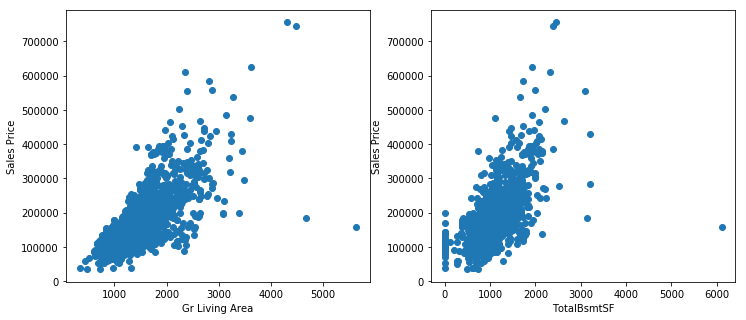

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(df_train.GrLivArea, df_train.SalePrice);
plt.xlabel('Gr Living Area')
plt.ylabel('Sales Price')

plt.subplot(1,2,2)
plt.scatter(df_train.TotalBsmtSF, df_train.SalePrice);
plt.xlabel('TotalBsmtSF');
plt.ylabel('Sales Price');

'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.

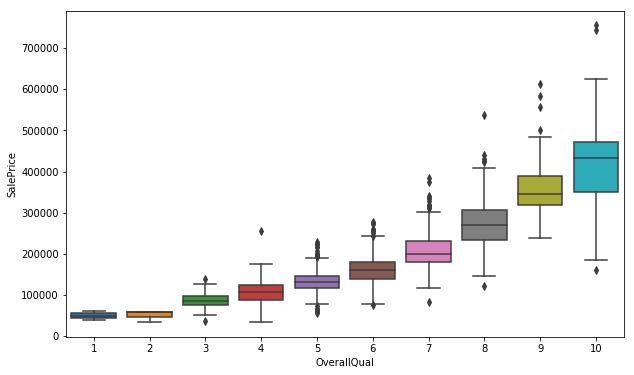

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train);

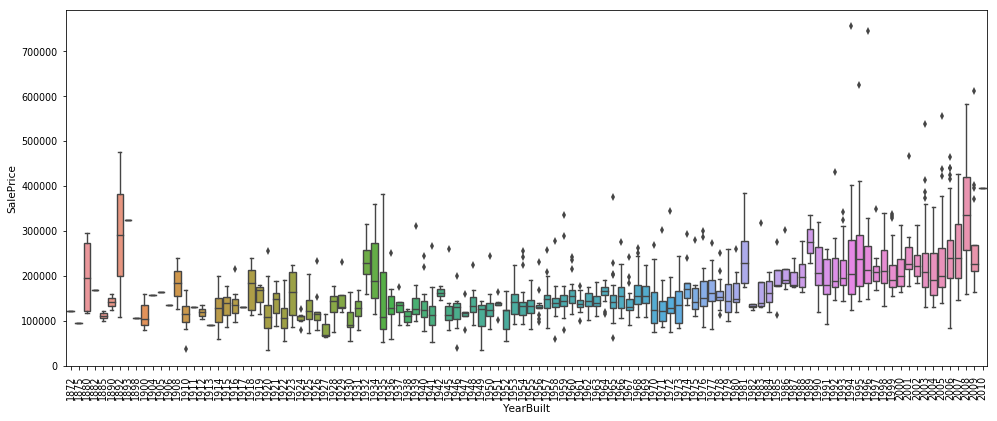

In [45]:
plt.figure(figsize=(14,6))
sns.set_context("paper", font_scale=1.2)  
sns.boxplot(x='YearBuilt', y='SalePrice', data=df_train, orient='v');
plt.xticks(rotation=90);
plt.tight_layout()

OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

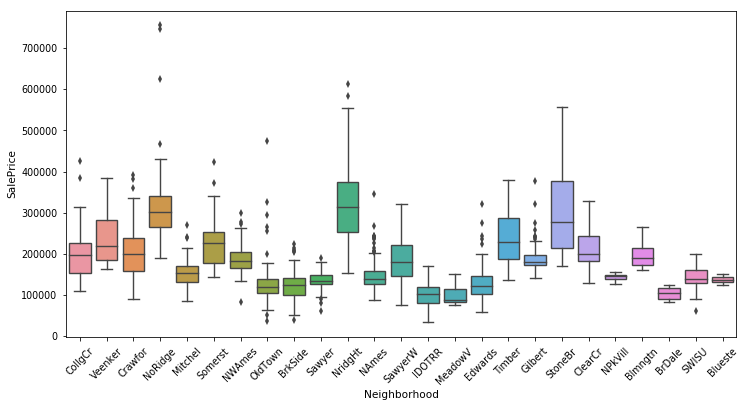

In [46]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df_train)
xt = plt.xticks(rotation=45)

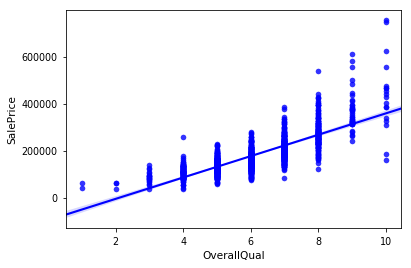

In [47]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = df_train, color = 'Blue');

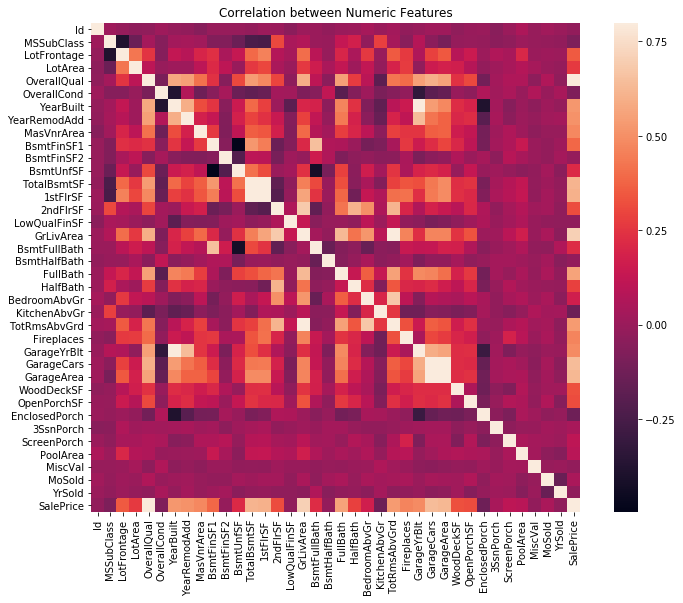

In [3]:
#correlation matrix
corr = df_train.corr()
plt.figure(figsize=(14,5))
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);
plt.title('Correlation between Numeric Features');

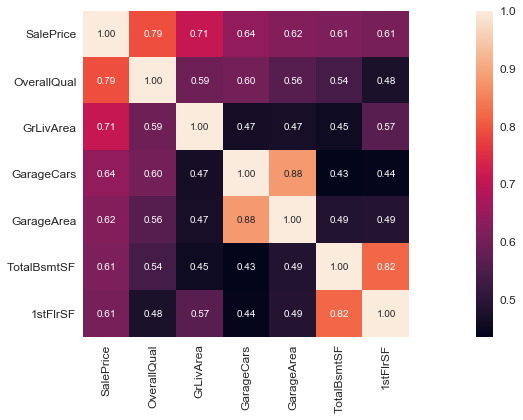

In [4]:
#saleprice correlation matrix
k = 7 #number of variables for heatmap
plt.figure(figsize=(24,6))
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

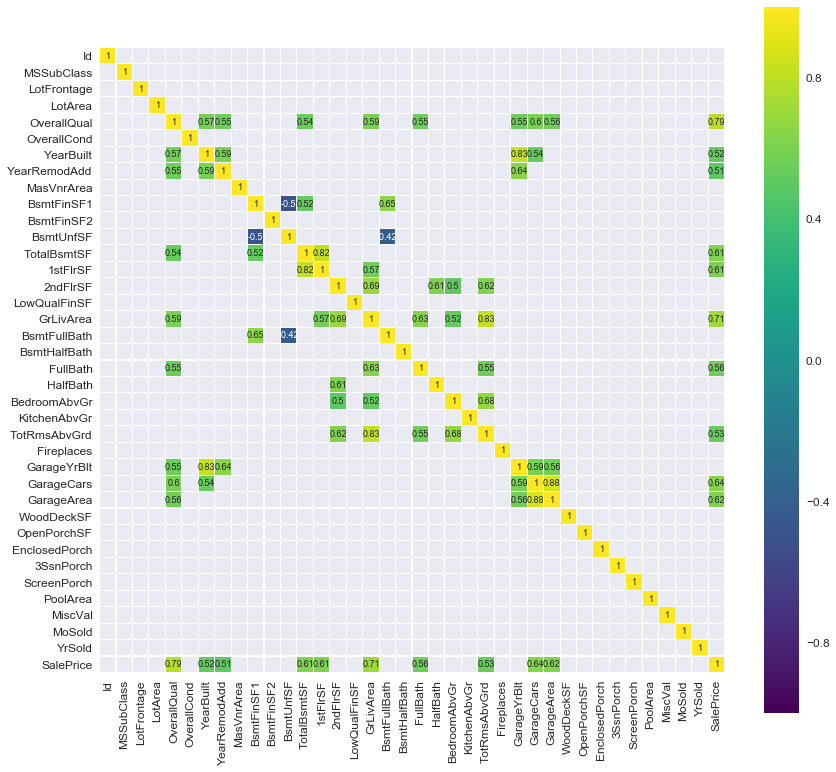

In [10]:
plt.figure(figsize=(14, 13))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 9}, square=True);

In [12]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df_train[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


SalePrice Statistical Summary:

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Median Sale Price: 163000.0
Skewness: 1.88287575977


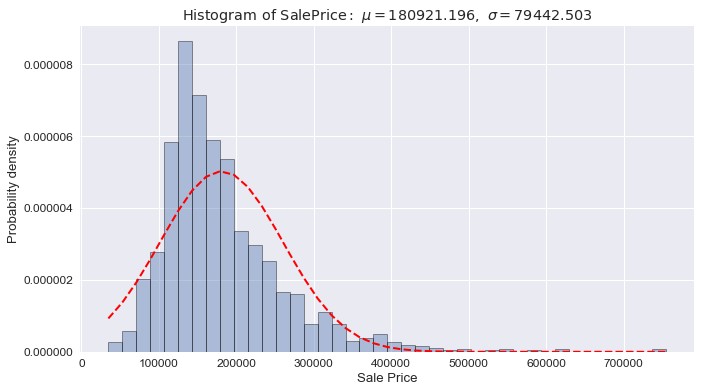

In [19]:
# Statistical Summary
print("SalePrice Statistical Summary:\n")
print(df_train['SalePrice'].describe())
print("Median Sale Price:", df_train['SalePrice'].median(axis = 0))
print('Skewness:',df_train['SalePrice'].skew())
skew = df_train['SalePrice'].skew()

# mean distribution
mu = df_train['SalePrice'].mean()

# std distribution
sigma = df_train['SalePrice'].std()
num_bins = 40

# Histogram of SalesPrice
plt.figure(figsize=(11, 6))
n, bins, patches = plt.hist(df_train['SalePrice'], num_bins, normed=1,edgecolor = 'black', lw = 1, alpha = .40)

# Normal Distribution
import matplotlib.mlab as mlab
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Sale Price')
plt.ylabel('Probability density')

plt.title(r'$\mathrm{Histogram\ of\ SalePrice:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
plt.grid(True)
#fig.tight_layout()
plt.show()

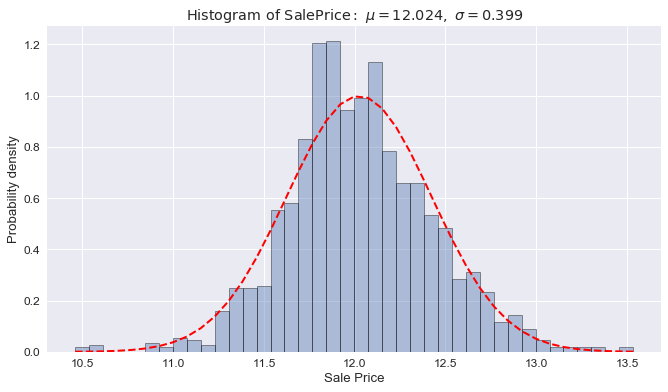

In [20]:
# Normalize SalePrice using log-transformation
sale_price_norm = np.log1p(df_train['SalePrice'])

# Mean distribution
mu = sale_price_norm.mean()

# Standard distribution
sigma = sale_price_norm.std()
num_bins = 40
plt.figure(figsize=(11, 6))
n, bins, patches = plt.hist(sale_price_norm, num_bins, normed=1, edgecolor = 'black', lw = 1,alpha = .40)

y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Sale Price')
plt.ylabel('Probability density')

plt.title(r'$\mathrm{Histogram\ of\ SalePrice:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
plt.grid(True)
#fig.tight_layout()
plt.show()

In [34]:
df_train.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

Clearly some variables display intense skews, so we'll need to address this later on. Note at this point our target variable is skewed as well (SalePrice), 

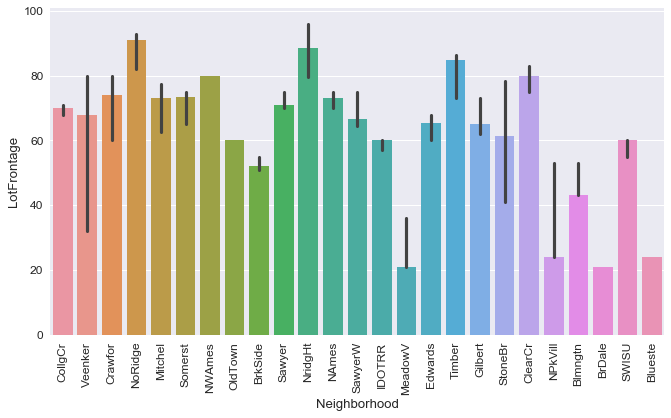

In [37]:
plt.figure(figsize=(11,6))
sns.barplot(data=df_train,x='Neighborhood',y='LotFrontage', estimator=np.median)
plt.xticks(rotation=90)
plt.show()
plt.gcf().clear();

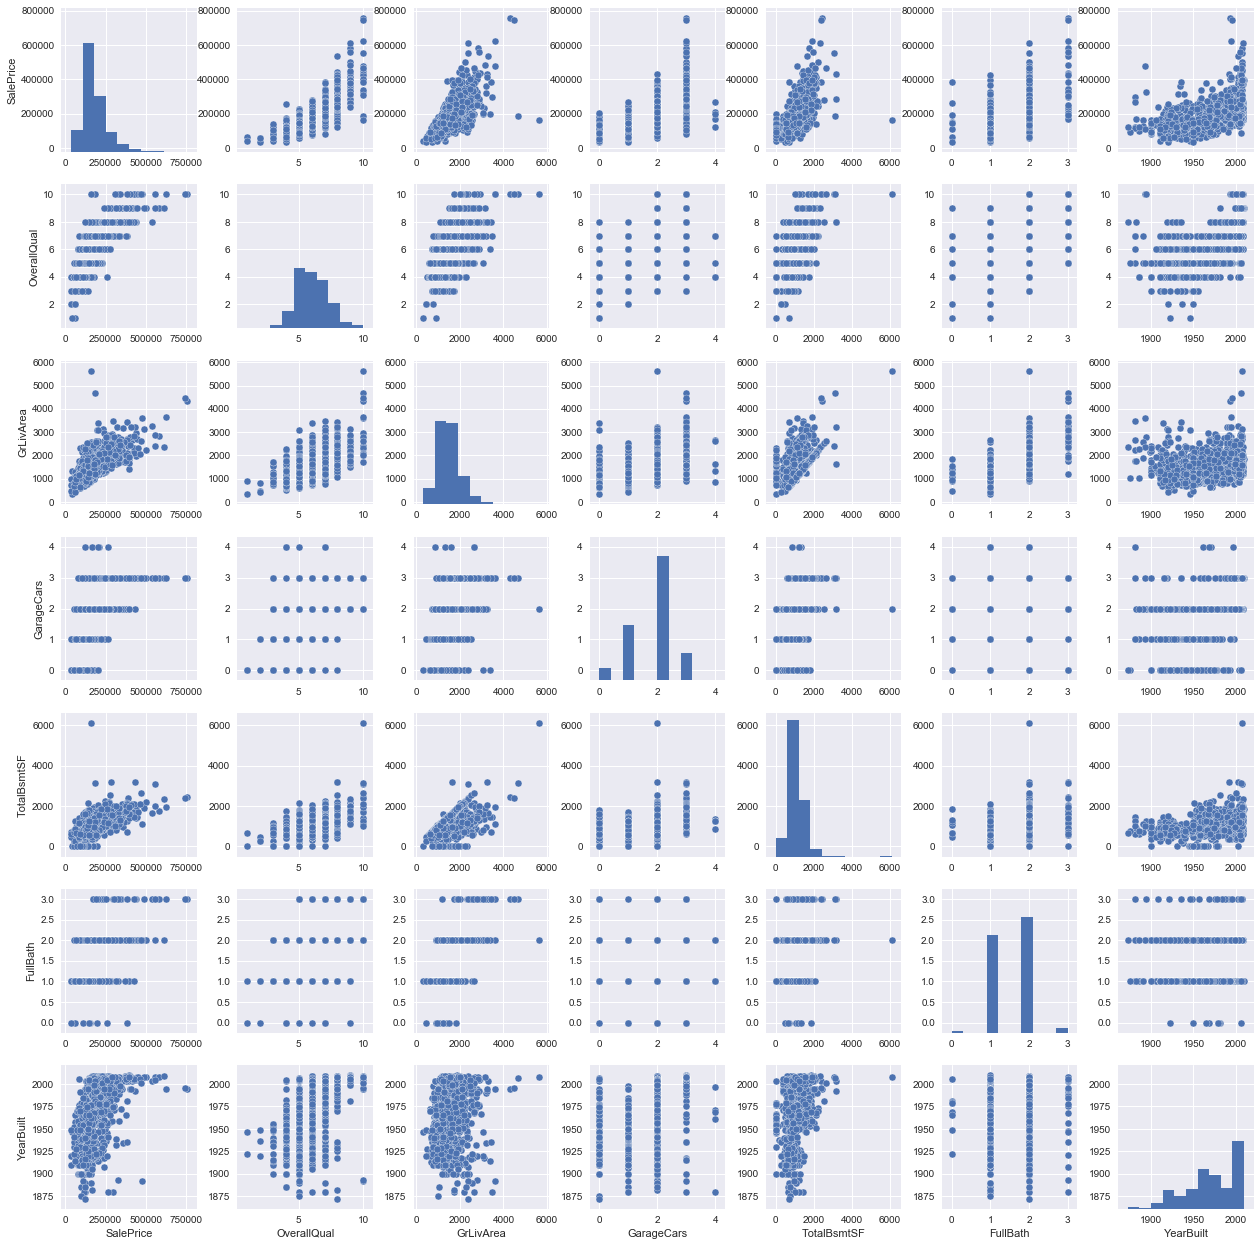

In [49]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

###  Missing Data Visualizations 

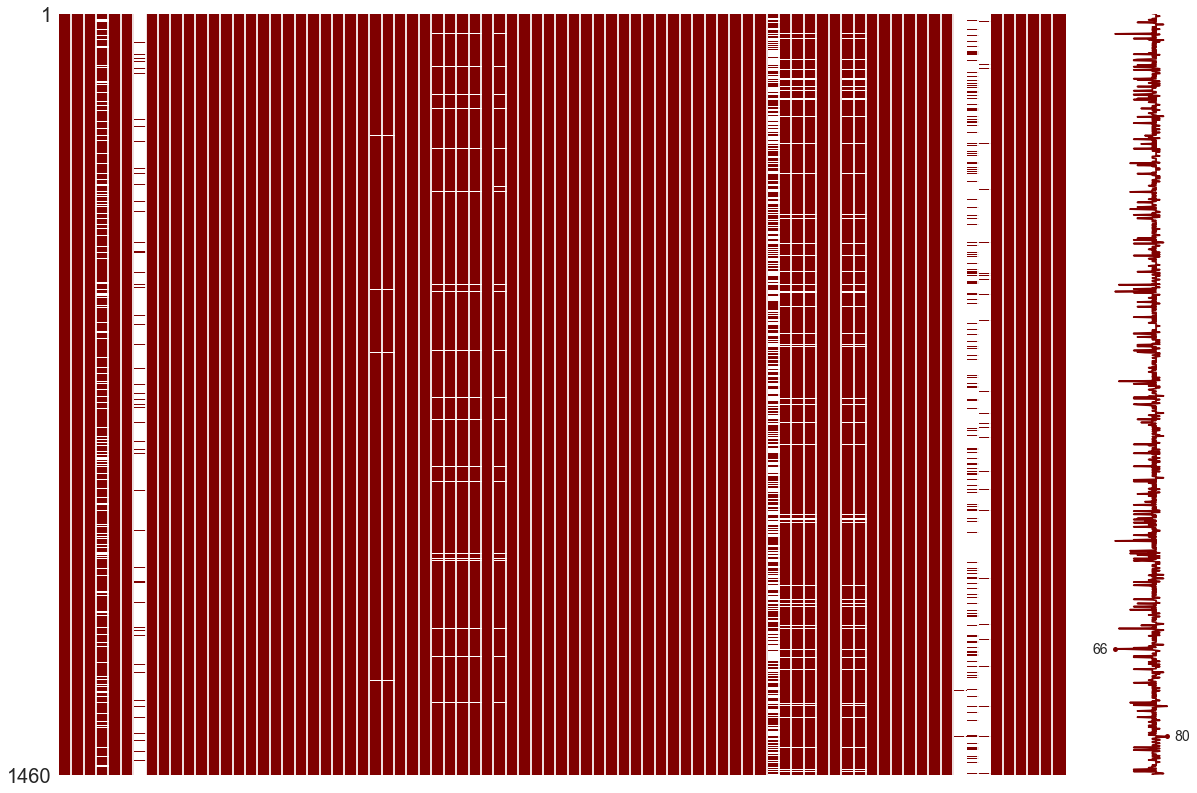

In [155]:
#Visualizing missing data
import missingno as msno # plotting missing data
msno.matrix(df=df_train, figsize=(20,14), color=(0.5,0,0))

The white elements have nan there. There seems to be some columns containing nan.

In [156]:
# Which columns have nan?
print('Displaying Features with NaN')
for i in np.arange(df_train.shape[1]):
    n = df_train.iloc[:,i].isnull().sum() 
    if n > 0:
        print(list(df_train.columns.values)[i] + ': ' + str(n) + ' nans')

Displaying Features with NaN
LotFrontage: 259 nans
Alley: 1369 nans
MasVnrType: 8 nans
MasVnrArea: 8 nans
BsmtQual: 37 nans
BsmtCond: 37 nans
BsmtExposure: 38 nans
BsmtFinType1: 37 nans
BsmtFinType2: 38 nans
Electrical: 1 nans
FireplaceQu: 690 nans
GarageType: 81 nans
GarageYrBlt: 81 nans
GarageFinish: 81 nans
GarageQual: 81 nans
GarageCond: 81 nans
PoolQC: 1453 nans
Fence: 1179 nans
MiscFeature: 1406 nans


In [3]:
total_null=df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
percent=percent*100
missing_data = pd.concat([total_null, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(12)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


Dropping Columns which have too many missing values to be useful. Also droping ID because its useless to the model

LotFrontage (259 missing values) , Alley (1369 missing values) , FireplaceQu (690 missing values) , PoolQC (1453 missing values) , Fence (1179 missing values) , MiscFeature (1406 missing values)

In [4]:
dataset = df_train.drop(['Id','LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)
#Get column count
print(len(dataset.columns))
dataset.isnull().sum().sort_values(ascending=False).head(5)

74


GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [159]:
dataset.shape

(1460, 74)

Let's keep the rows where it has data for at least 70 percent of its features

In [5]:
dataset=dataset.dropna(thresh=70)
len(dataset.columns)
dataset.shape

(1349, 74)

After dropping columns there are 74 columns and 1349 rows

In [75]:
#dealing with missing data
#df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
#df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
#df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [161]:
#standardizing data
#saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
#low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
#high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
#print('outer range (low) of the distribution:')
#print(low_range)
#print('\nouter range (high) of the distribution:')
#print(high_range)

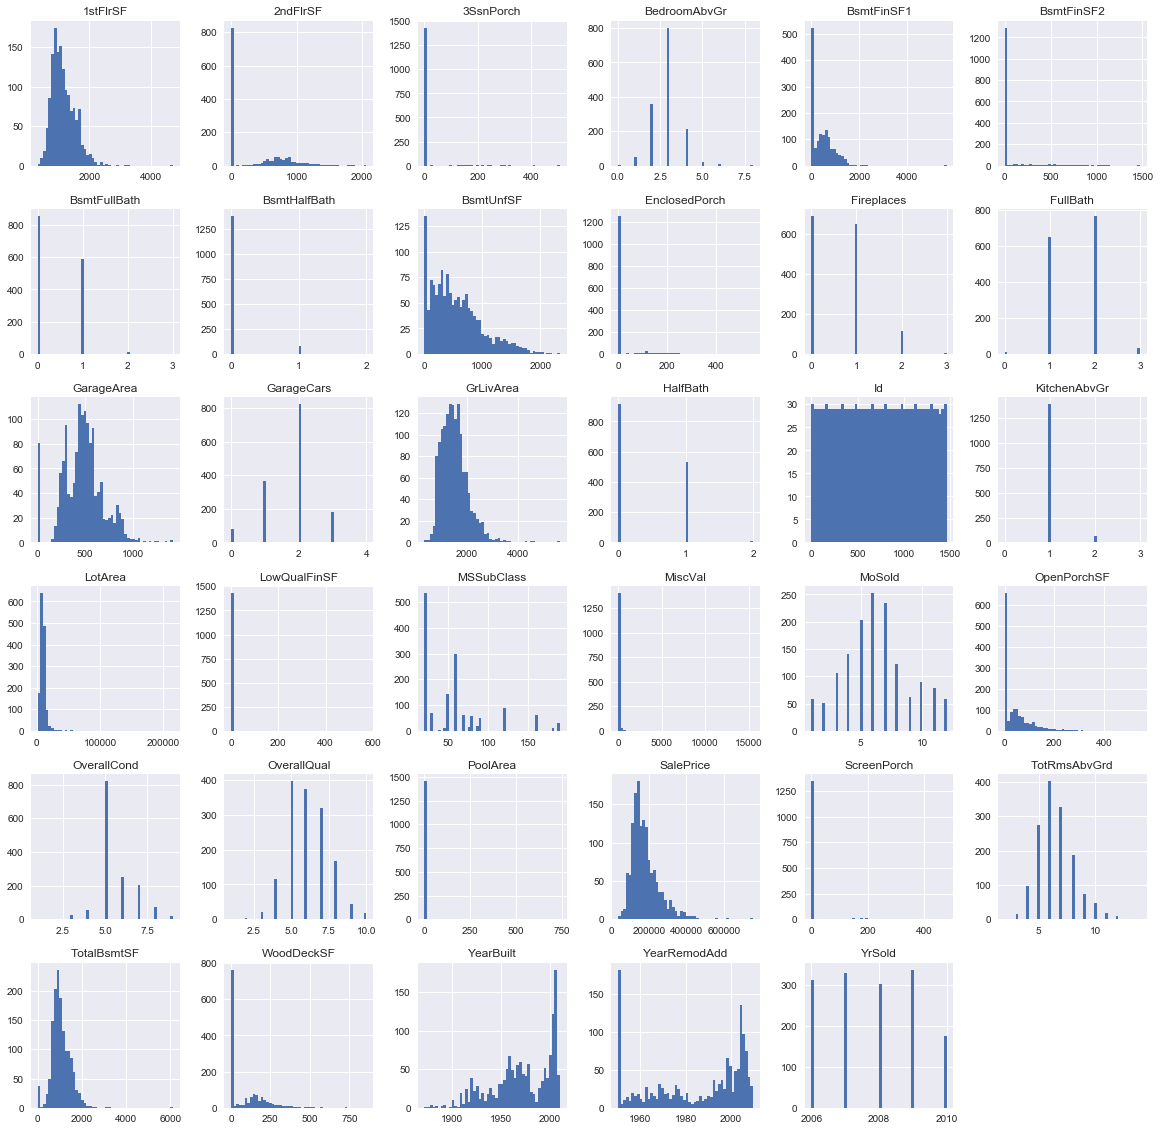

In [80]:
df_train.hist(bins = 50 , figsize = (20,20))
plt.show()

## Feature and Target

In [6]:
X=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1] #Dependant Varible (SalePrice)

In [8]:
# log-transform the dependent variable for normality
y = np.log(y)

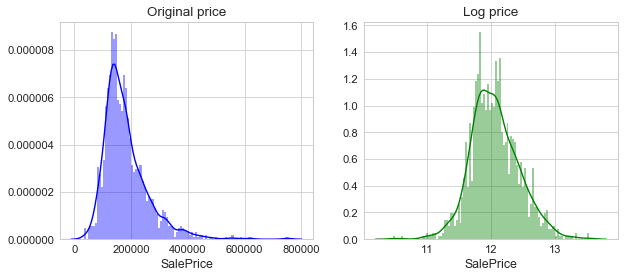

In [9]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.4)  
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)

plt.subplot(1,2,1)
plt.title('Original price')
sns.distplot(df_train['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});

plt.subplot(1,2,2)
plt.title('Log price')
sns.distplot(y, color='g', bins=100, hist_kws={'alpha': 0.4});

Categoical Data Type

In [10]:
X.head(2)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal


In [13]:
a=X.select_dtypes(include=['object'])
a.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [11]:
#X=X.dropna(inplace=True)
X = X.fillna(X.median())

In [14]:
X = pd.get_dummies(data = X , columns=a, drop_first=True)
X.head(2)
#Get k-1 dummies out of k categorical levels by removing the first level

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0


In [15]:
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import Imputer #for handling missing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

## Multiple Linear Regression Model

In [17]:
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr=lin_reg.predict(X_test)

#Mutiple Linear Regression Accuracy with test set
accuracy_LinReg = metrics.r2_score(y_test, y_pred_lr)
print('Mutiple Linear Regression Accuracy: ', accuracy_LinReg)

#Predicting the SalePrice using cross validation (KFold method)
y_pred_kf_lr = cross_val_predict(lin_reg, X, y, cv=10 )

#Mutiple Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_lr)
print('Cross-Predicted(KFold) Mutiple Linear Regression Accuracy: ', accuracy_lf)

Mutiple Linear Regression Accuracy:  0.548025890527
Cross-Predicted(KFold) Mutiple Linear Regression Accuracy:  0.75824124301


R Squared is 0.54

## Polynomial Regression

In [181]:
poly_reg=PolynomialFeatures(degree=2)
X_poly_train=poly_reg.fit_transform(X_train)
X_poly_test=poly_reg.fit_transform(X_test)
lin_reg_pl=LinearRegression()
lin_reg_pl.fit(X_poly_train, y_train)
y_pred_pl=lin_reg_pl.predict(X_poly_test)

#Polynomial Regression Accuracy with test set
accuracy_LinReg = metrics.r2_score(y_test, y_pred_pl)
print('Mutiple Linear Regression Accuracy: ', accuracy_LinReg)

#Predicting the SalePrice using cross validation (KFold method)
y_pred_pl = cross_val_predict(lin_reg_pl, X_poly, y, cv=10 )
#Polynominal Regression Accuracy with cross validation
accuracy_pl = metrics.r2_score(y, y_pred_pl)
print('Cross-Predicted(KFold) Polynominal Regression Accuracy: ', accuracy_pl)

Mutiple Linear Regression Accuracy:  -12.6130806895
Cross-Predicted(KFold) Polynominal Regression Accuracy:  -30.8874879274


R Squared is -12.61. So the polynominal regression is not suitable for this dataset

## Decision Tree Regression

In [182]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_dt = dt_regressor.predict(X_test)

#Decision Tree Regression Accuracy with test set
print('Decision Tree Regression Accuracy: ', dt_regressor.score(X_test,y_test))

#Predicting the SalePrice using cross validation (KFold method)
y_pred_dt = cross_val_predict(dt_regressor, X, y, cv=10 )
#Decision Tree Regression Accuracy with cross validation
accuracy_dt = metrics.r2_score(y, y_pred_dt)
print('Cross-Predicted(KFold) Decision Tree Regression Accuracy: ', accuracy_dt)

Decision Tree Regression Accuracy:  0.673817420357
Cross-Predicted(KFold) Decision Tree Regression Accuracy:  0.720600791642


R Squared is 0.71 . This model is better than linear regression model

## Random Forest Regression

In [18]:
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_rf = rf_regressor.predict(X_test)

#Random Forest Regression Accuracy with test set
print('Random Forest Regression Accuracy: ', rf_regressor.score(X_test,y_test))

#Predicting the SalePrice using cross validation (KFold method)
y_pred_rf = cross_val_predict(rf_regressor, X, y, cv=10 )

#Random Forest Regression Accuracy with cross validation
accuracy_rf = metrics.r2_score(y, y_pred_rf)
print('Cross-Predicted(KFold) Random Forest Regression Accuracy: ', accuracy_rf)

Random Forest Regression Accuracy:  0.87347929245
Cross-Predicted(KFold) Random Forest Regression Accuracy:  0.864604144214


R Squared is 0.80

## Feature Importance

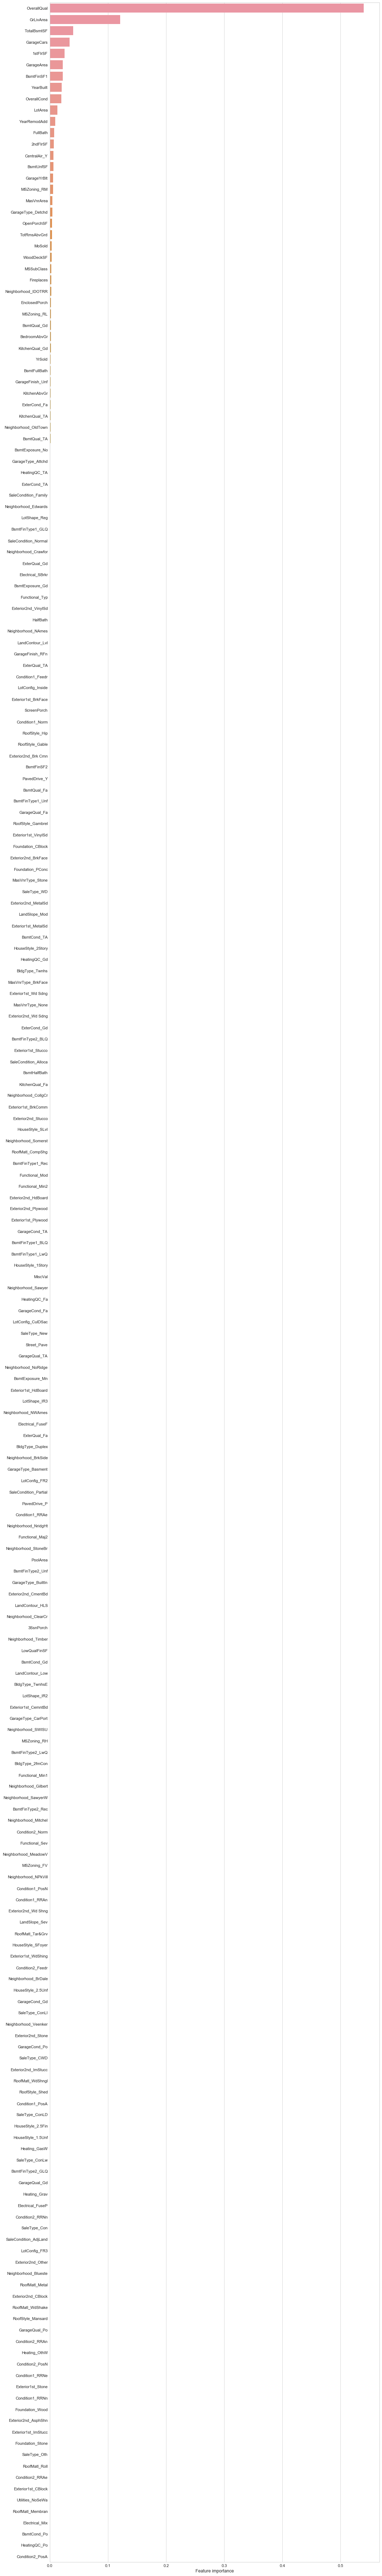

In [19]:
ranking = np.argsort(-rf_regressor.feature_importances_)
f, ax = plt.subplots(figsize=(15, 100))
sns.barplot(x=rf_regressor.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("Feature importance")
plt.tight_layout()
plt.show()

## Keeping Top 30 Dominant Fearures

In [20]:
X_train = X_train.iloc[:,ranking[:30]]
X_test = X_test.iloc[:,ranking[:30]]

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_lr = lin_reg.predict(X_test)

#Mutiple Linear Regression Accuracy with test set
accuracy_lf = metrics.r2_score(y_test, y_pred_lr)
print('Mutiple Linear Regression Accuracy: ', accuracy_lf)

#Predicting the SalePrice using cross validation (KFold method)
y_pred_kf_lr = cross_val_predict(lin_reg, X, y, cv=10 )

#Mutiple Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_lr)
print('Cross-Predicted(KFold) Mutiple Linear Regression Accuracy: ', accuracy_lf)

Mutiple Linear Regression Accuracy:  0.814929004837
Cross-Predicted(KFold) Mutiple Linear Regression Accuracy:  0.75824124301


Before reducing the less dominant features mutiple linear regression accuracy was 0.22 . After reducing features it's 0.81

## Xgboost

In [187]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

my_model = GradientBoostingRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train)
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

accuracy_gb = metrics.r2_score(y_test, predictions)
print('Mutiple Linear Regression Accuracy: ', accuracy_gb)

Mean Absolute Error : 0.00722702124789
Mutiple Linear Regression Accuracy:  0.874202682483


In [188]:
# Initialize and fit the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# R^2 (coefficient of determination) regression score function
# Mean squared error regression loss

benchmark_model = LinearRegression() #object of class LinearRegression

start = time()
benchmark_model.fit(X_train, y_train) #Fit object to training set
end = time()
y_pred=benchmark_model.predict(X_test)
print("Classifier fitted in {:.2f} seconds".format(end-start))
print("Score on Training data : {:.2f}%".format(benchmark_model.score(X_train, y_train) * 100))
print("Score on Testing data : {:.2f}%".format(benchmark_model.score(X_test, y_test) * 100))
print("RMSE : {:.3f}".format(np.sqrt(np.mean((y_test - y_pred)**2))))

Classifier fitted in 0.02 seconds
Score on Training data : 86.18%
Score on Testing data : 81.51%
RMSE : 0.013


Multiple Algoithms

In [189]:
# Function to fit the regressor and record performance metrics
def pipeline(reg, X_train, y_train, X_test, y_test, **kwargs):
    
    # Dictionary to hold properties of Models
    reg_props = {}
    
    # Initialize and fit the regressor, and time taken
    regressor = reg(**kwargs)
    start = time()
    regressor.fit(X_train, y_train)
    end = time()
    
    # Store the metrics for the regressor
    reg_props["name"] = reg.__name__
    reg_props["train_time"] = end - start
    reg_props["train_score"] = regressor.score(X_train, y_train)
    reg_props["test_score"] = regressor.score(X_test, y_test)
    reg_props["rmse"] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
    
    return reg_props

In [190]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        KNeighborsRegressor,
        RandomForestRegressor,
        GradientBoostingRegressor,
        MLPRegressor,
        ExtraTreesRegressor,
            ]
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train, y_train, X_test, y_test)
        props.append(properites)
        
    return props

In [191]:
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the Regressors
    names = [prop["name"] for prop in properties]
    train_times = [prop["train_time"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    rmse_vals = [prop["rmse"] for prop in properties]
        
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training Times": train_times,
                            "Training Scores": train_scores,
                            "Testing Scores": test_scores,
                            "RMSE": rmse_vals  
                      }
                  )
    
    return df

# Obain the properties in a structured DataFrame after executing the pipeline
properties = get_properties()

In [192]:
# Append the peoperties of Linear Rgression Benchmark model to the DataFrame
# Storing the properties of Selected models

properties = pd.concat(
    [properties,
    pd.Series(
    {
        "Name": "Linear Regression (Benchmark)",
        "RMSE": np.sqrt(mean_squared_error(y_test, benchmark_model.predict(X_test))),
        "Training Scores": benchmark_model.score(X_train, y_train),
        "Testing Scores" :benchmark_model.score(X_test, y_test),
        "Training Times": end - start
        
    }
    ).to_frame().T.set_index(["Name"])]
)

properties

,RMSE,Testing Scores,Training Scores,Training Times
Ridge,0.0128891,0.815472,0.861831,0
KNeighborsRegressor,0.0174127,0.663218,0.77564,0
RandomForestRegressor,0.011984,0.840477,0.970518,0.154801
GradientBoostingRegressor,0.0102891,0.88241,0.949296,0.191134
MLPRegressor,15.8417,-278754,-201059,0.431808
ExtraTreesRegressor,0.0125129,0.826085,0.999998,0.0810575
Linear Regression (Benchmark),0.0129033,0.815065,0.861836,0.0156224


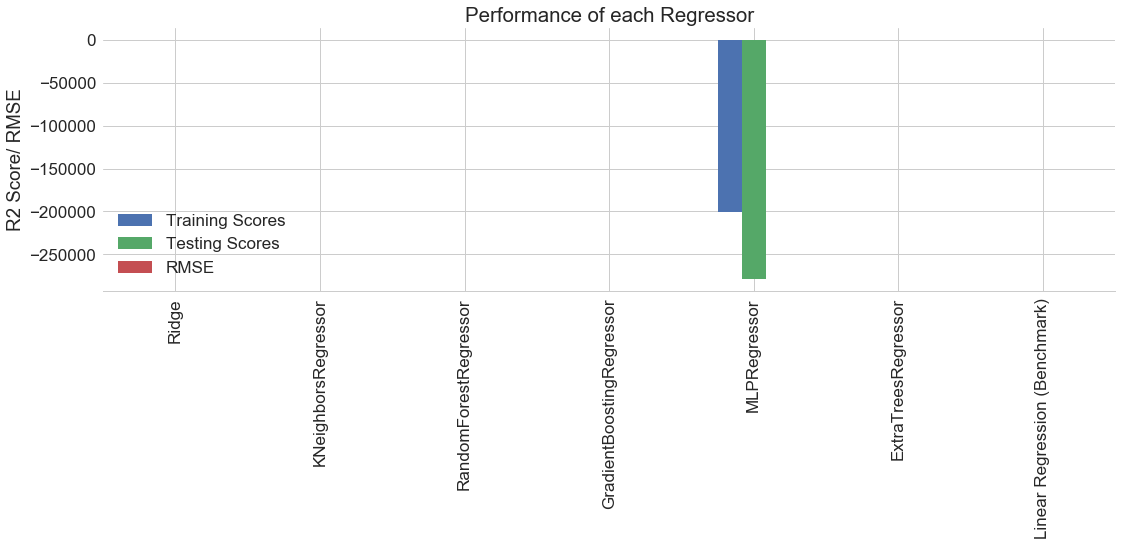

In [193]:
# Plot to compare the performance of Models on both datasets
sns.set_context("notebook", font_scale=1.7)
ax= properties[["Training Scores", "Testing Scores", "RMSE"]].plot(kind="bar", title="Performance of each Regressor", figsize=(16, 8))
ax.set_ylabel("R2 Score/ RMSE");
sns.despine(left=True)
plt.tight_layout()
#plt.savefig('output.jpeg', dpi=400)

In [197]:
from sklearn.model_selection import RandomizedSearchCV
seed = 42
np.random.seed(seed)

# Initialize the best performing regressor
clf =GradientBoostingRegressor(random_state=seed)

# Define the parameter subset
param_grid = {
    "n_estimators": [50, 75, 100, 150, 300],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [100,150, 200, 250, 300]
}

# Use Randomized search to try 20 subsets from parameter space with 5-fold cross validation
grid_search = RandomizedSearchCV(clf, param_grid, n_iter=10, scoring="r2", cv=3, n_jobs=-1, verbose=2, random_state=seed)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.1s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [50, 75, 100, 150, 300], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [100, 150, 200, 250, 300]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='r2', verbose=2)

In [198]:
#Display best params
print("Parameters of best Regressor : {}".format(grid_search.best_params_))

Parameters of best Regressor : {'n_estimators': 150, 'max_features': 'log2', 'max_depth': 150}


In [199]:
best_model = grid_search.best_estimator_

# Display metrics on training and test set
print("R2 score on Training set = {:.3f}".format(best_model.score(X_train, y_train)))
print("RMSE on Training set = {:.3f}".format(np.sqrt(mean_squared_error(y_train, best_model.predict(X_train)))))
print("R2 score on Testing set = {:.3f}".format(best_model.score(X_test, y_test)))
print("RMSE on Testing set = {:.3f}".format(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))))

R2 score on Training set = 1.000
RMSE on Training set = 0.000
R2 score on Testing set = 0.875
RMSE on Testing set = 0.011


In [200]:
# Find the index of most and least important feature and display that column
print("Most important feature = {}".format(X_train.columns[np.argmax(best_model.feature_importances_)]))
print("Least important feature = {}".format(X_train.columns[np.argmin(best_model.feature_importances_)]))

# Get the indices based on feature importance in ascending order 
feature_indices = np.argsort(best_model.feature_importances_)

print("\nTop 5 most important features:-")
# Reverse the array to get important features at the beginning
for index in feature_indices[::-1][:5]:
    print(X_train.columns[index])
    
print("\nTop 5 least important features:-")
for index in feature_indices[:5]:
    print(X_train.columns[index])

Most important feature = OverallQual
Least important feature = Neighborhood_IDOTRR

Top 5 most important features:-
OverallQual
GrLivArea
YearBuilt
TotalBsmtSF
GarageArea

Top 5 least important features:-
Neighborhood_IDOTRR
EnclosedPorch
WoodDeckSF
MoSold
BsmtQual_Gd


In [201]:
# Plot feature importance
fi = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(best_model.feature_importances_))
fi.sort_values(by=0, ascending=False)
fi.head()

,0
Neighborhood_IDOTRR,0.000566
EnclosedPorch,0.000736
WoodDeckSF,0.001660
MoSold,0.001707
BsmtQual_Gd,0.002501


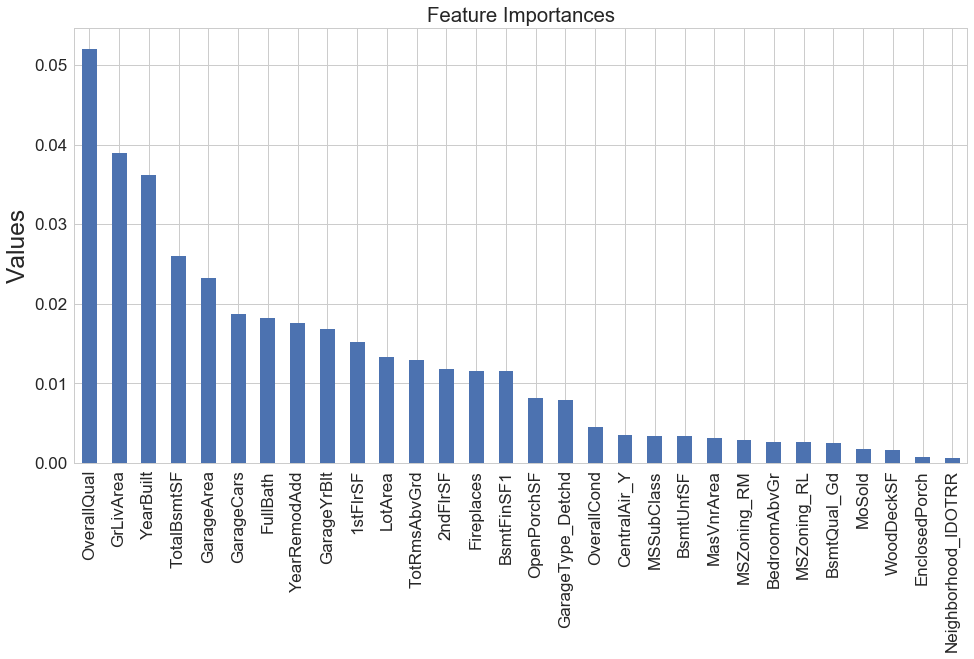

In [202]:
# Plot feature importance
fi = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(best_model.feature_importances_))
fi.sort_values(by=0, ascending=False, inplace=True)
ax = fi.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()

In [24]:
# SVR
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

reg_svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
reg_svr.fit(X_train, y_train)

print(reg_svr.best_score_)
print(reg_svr.best_params_)

0.000574017790823
{'C': 1.0, 'gamma': 0.01}


In [ ]:
2+2